In [1]:
from sympy import *
import numpy as np
from sympy.plotting import *
import matplotlib.pyplot as plt
#Vytvoření symbolických proměnných
k,t, tau, T_0, h,tt = symbols("k,t, tau, T_0, h,tt");
pocet_harmonickych = 10;
h_num = 5;
T_0_num = 4;
tau_num = 0.5 * T_0_num;
f_0_num = 1 / T_0_num;
f_0 = 1/T_0
#Definice signálu
x = h_num*(Heaviside(t+1)-Heaviside(t-1))

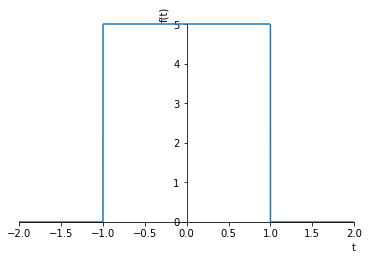

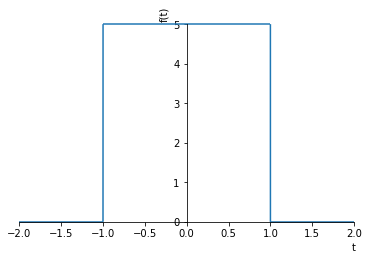

In [36]:
#Vykresleni signálu
vektor_t = np.arange(-2,2, 1/100)

x_num = []
for p in vektor_t:
    x_num.append(x.subs(t,p))

p = plot(x,(t,-tau_num,tau_num))
p.save('sympysignal.png')

In [3]:
c_0 = 1/T_0 * integrate(h, (t, -tau/2, tau/2)); c_0


h*tau/T_0

In [4]:
c_0_num = c_0.subs(h,h_num);
c_0_num = c_0_num.subs(T_0,T_0_num);
c_0_num = c_0_num.subs(tau,tau_num)
c_0_num

2.50000000000000

In [5]:
c_k = 1/T_0 * integrate(h * exp(-1j * 2*pi*f_0 * k * t),(t, -tau/2, tau/2)); c_k_simp = c_k.simplify(); c_k_simp

Piecewise((1.0*h*sin(pi*k*tau/T_0)/(pi*k), (k > -oo) & (k < oo) & Ne(k, 0)), (h*tau/T_0, True))

In [6]:
c_k_nnum = c_k_simp.subs(h,h_num);
c_k_nnum = c_k_nnum.subs(T_0,T_0_num);
c_k_nnum = c_k_nnum.subs(tau,tau_num);
c_k_nnum

Piecewise((5.0*sin(0.5*pi*k)/(pi*k), (k > -oo) & (k < oo) & Ne(k, 0)), (2.5, True))

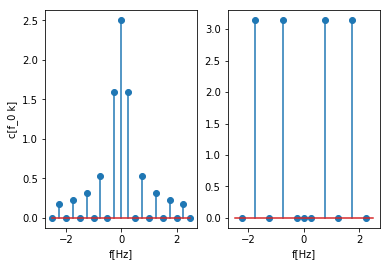

In [7]:
vektor_k_num = np.arange(-pocet_harmonickych, pocet_harmonickych+1, 1)
vektor_f_num = f_0_num * vektor_k_num
#Koeficienty Fourierovy řady v komplexním tvaru
c_k_num = []
abs_c_k_num = []
angle_c_k_num = []
for kk in vektor_k_num:
    if (kk==0):
        c_k_num.append(limit(c_k_nnum, k,kk))
        abs_c_k_num.append(abs(limit(c_k_nnum, k,kk)))
        angle_c_k_num.append(atan2(im(limit(c_k_nnum, k,kk)), re(limit(c_k_nnum, k,kk)) ) )
    else:
        c_k_num.append(c_k_nnum.subs(k,kk))
        abs_c_k_num.append(abs(c_k_nnum.subs(k,kk)))
        angle_c_k_num.append(atan2(im(c_k_nnum.subs(k,kk)), re(c_k_nnum.subs(k,kk)) ) )
#Zobrazení spektra
plt.subplot(121);
plt.stem(vektor_f_num, abs_c_k_num);
plt.xlabel('f[Hz]')
plt.ylabel('c[f_0 k]')
plt.savefig('sympymspektrum.png')
plt.subplot(122);
plt.stem(vektor_f_num, angle_c_k_num);
plt.xlabel('f[Hz]')
plt.savefig('sympyfspektrum.png')

In [8]:
vektor_t_synteza = np.arange(1,pocet_harmonickych,1)
vektor_t_synteza
vektor_t_num_real = np.arange(0,pocet_harmonickych,1)
vektor_f_num_real = f_0_num * vektor_t_num_real

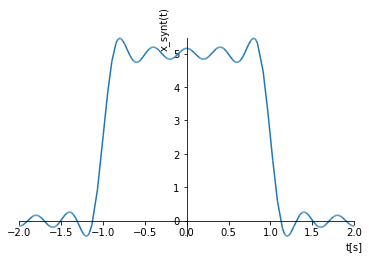

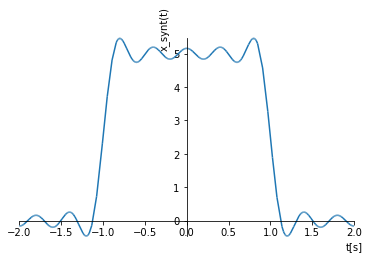

In [35]:
#Syntéza signálu z koeficientů Fourierovy řady v komplexním tvaru
x_synt_kompl = c_0_num
for i in range(1,pocet_harmonickych):
    x_synt_kompl=x_synt_kompl+(c_k_nnum.subs(k,-i)*(exp(1j*(-i)*2*f_0_num*np.pi*tt))+c_k_nnum.subs(k,i)*(exp(1j*i*2*np.pi*f_0_num*tt)))
p = plot(x_synt_kompl,(tt,-tau_num,tau_num),xlabel="t[s]",ylabel="x_synt(t)")
p.save('sympysynteza.png')

Text(0, 0.5, 'b[f_0 k]')

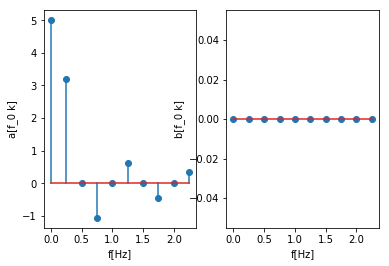

In [11]:
#Koeficienty Fourierovy řady v reálnem tvaru
vektor_k_num_real = np.arange(0, pocet_harmonickych, 1)
vektor_f_num_real = f_0_num * vektor_k_num_real
a_0 = c_0_num*2;
a_k = (2*re(c_k_nnum))
b_k = (-2*im(c_k_nnum))
a_k_num = []
b_k_num = []
for kk in vektor_k_num_real:
    if (kk==0):
        a_k_num.append(limit(a_k, k,kk))
        b_k_num.append(limit(b_k, k,kk))
    else:
        a_k_num.append(a_k.subs(k,kk))
        b_k_num.append(b_k.subs(k,kk))
#Zobrazení spektra
plt.subplot(121);
plt.stem(vektor_f_num_real, a_k_num);
plt.xlabel('f[Hz]')
plt.ylabel('a[f_0 k]')
plt.subplot(122);
plt.stem(vektor_f_num_real, b_k_num);
plt.xlabel('f[Hz]')
plt.ylabel('b[f_0 k]')

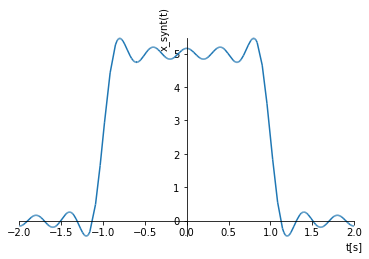

In [12]:
#synteza signalu z koeficientu Fourierovy řady v reálnem tvaru
x_synt_real = a_0/2
kk=1
for i in range(1,pocet_harmonickych):
    x_synt_real = x_synt_real + ((a_k.subs(k,i)) * cos(2*np.pi*f_0_num*i*tt)) + ((b_k.subs(k,i)) * sin(2*np.pi*f_0_num*i*tt))
plot(x_synt_kompl,(tt,-tau_num,tau_num),xlabel="t[s]",ylabel="x_synt(t)")

Text(0, 0.5, 'phi[k]')

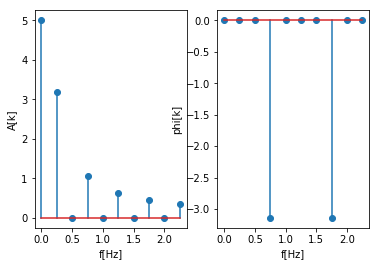

In [13]:
#Koeficienty Fourierovy řady v I. elektrotechnickem tvaru c_k => A_k, phi_k
A_0 = c_0_num
A_k = 2*abs(c_k_nnum)
A_k_num = []
phi_k_num = []
for kk in vektor_k_num_real:
    if (kk==0):
        A_k_num.append(limit(A_k, k,kk))
        phi_k_num.append(-atan2(im(limit(c_k_nnum, k,kk)),re(limit(c_k_nnum, k,kk))))
    elif (atan2(im(c_k_nnum.subs(k,kk)),re(c_k_nnum.subs(k,kk))))==nan:
        A_k_num.append(A_k.subs(k,kk))
        phi_k_num.append(0)
    else:
        A_k_num.append(A_k.subs(k,kk))
        phi_k_num.append(-atan2(im(c_k_nnum.subs(k,kk)),re(c_k_nnum.subs(k,kk))))
plt.subplot(121);
plt.stem(vektor_f_num_real, A_k_num);
plt.xlabel('f[Hz]')
plt.ylabel('A[k]')
plt.subplot(122);
plt.stem(vektor_f_num_real, phi_k_num);
plt.xlabel('f[Hz]')
plt.ylabel('phi[k]')

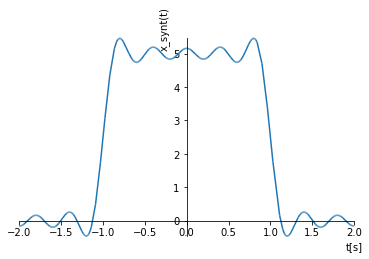

In [14]:
#syntéza signálu z koeficientů Fourierovy řady v I. elektrotechnickém tvaru
x_synt_I_elt = A_0
for ii in range(1,pocet_harmonickych):
    x_synt_I_elt = x_synt_I_elt + A_k_num[ii]*cos(2*np.pi*f_0_num *tt* ii - phi_k_num[ii])
plot(x_synt_I_elt,(tt,-tau_num,tau_num),xlabel="t[s]",ylabel="x_synt(t)")

Text(0, 0.5, 'psi[k]')

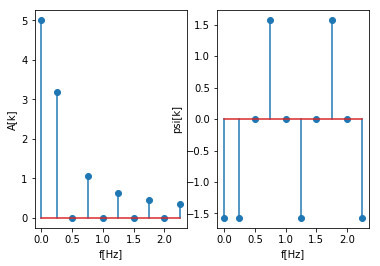

In [15]:
#II. elekt. tvar c_k => A_k, psi_k
A_0 = c_0_num
A_k = 2*abs(c_k_nnum)
A_k_num = []
psi_k_num = []
for kk in vektor_k_num_real:
    if (kk==0):
        A_k_num.append(limit(A_k, k,kk))
        psi_k_num.append(-atan2(im(1j*limit(c_k_nnum, k,kk)),re(1j*limit(c_k_nnum, k,kk))))
    elif (atan2(im(1j*c_k_nnum.subs(k,kk)),re(1j*c_k_nnum.subs(k,kk))))==nan:
        A_k_num.append(A_k.subs(k,kk))
        psi_k_num.append(0)
    else:
        A_k_num.append(A_k.subs(k,kk))
        psi_k_num.append(-atan2(im(1j*c_k_nnum.subs(k,kk)),re(1j*c_k_nnum.subs(k,kk))))
plt.subplot(121);
plt.stem(vektor_f_num_real, A_k_num);
plt.xlabel('f[Hz]')
plt.ylabel('A[k]')
plt.subplot(122);
plt.stem(vektor_f_num_real, psi_k_num);
plt.xlabel('f[Hz]')
plt.ylabel('psi[k]')

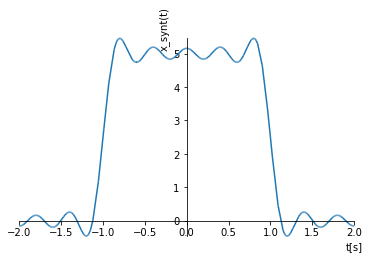

In [16]:
#Syntéza signálu z koeficientů Fourierovy řady v II. elekt. tvaru
x_synt_I_elt = A_0
for ii in range(1,pocet_harmonickych):
    x_synt_I_elt = x_synt_I_elt + A_k_num[ii]*(sin(2*np.pi*f_0_num *tt* ii - psi_k_num[ii]))
plot(x_synt_I_elt,(tt,-tau_num,tau_num),xlabel="t[s]",ylabel="x_synt(t)")

Text(0, 0.5, 'b[k]')

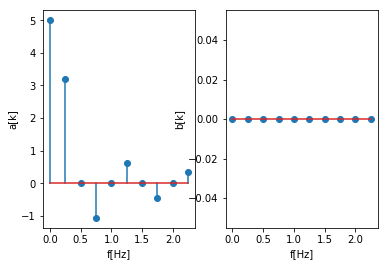

In [17]:
#Koeficienty Fourierovy řady v reálném tvaru
a_0 = 2* 1/T_0_num * integrate(h_num,(t,-tau_num/2, tau_num/2))
a_k = 2* 1/T_0_num * integrate(h_num*cos(2*np.pi*f_0_num*k*t),(t,-tau_num/2,tau_num/2))
b_k = 2* 1/T_0_num * integrate(h_num*sin(2*np.pi*f_0_num*k*t),(t,-tau_num/2,tau_num/2))
a_k_num = []
b_k_num = []
for kk in vektor_k_num_real:
    if (kk==0):
        a_k_num.append(limit(a_k, k,kk))
        b_k_num.append(limit(b_k, k,kk))
    else:
        a_k_num.append(a_k.subs(k,kk))
        b_k_num.append(limit(b_k, k,kk))
plt.subplot(121);
plt.stem(vektor_f_num_real, a_k_num);
plt.xlabel('f[Hz]')
plt.ylabel('a[k]')
plt.subplot(122);
plt.stem(vektor_f_num_real, b_k_num);
plt.xlabel('f[Hz]')
plt.ylabel('b[k]')

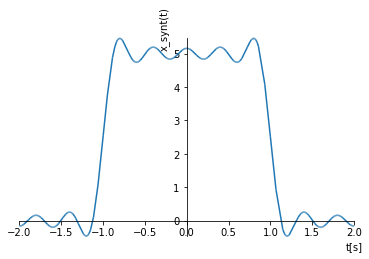

In [18]:
#syntéza signálu z koeficientů Fourierovy řady v reálném tvaru
x_synt_real = a_0/2
for kk in range(1,pocet_harmonickych):
    x_synt_real = x_synt_real +a_k.subs(k,kk)*cos(2*np.pi*f_0_num*kk*tt)+b_k.subs(k,kk)*sin(2*np.pi*f_0_num*kk*tt)
plot(x_synt_real,(tt,-tau_num,tau_num),xlabel="t[s]",ylabel="x_synt(t)")

Text(0, 0.5, 'c[f_0 k]')

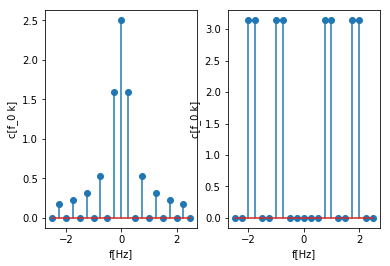

In [19]:
#Koeficienty Fourierovy řady v komplexním tvaru a_k,b_k => c_kk
c_0 = a_0/2
c_kk = (a_k - 1j*b_k)/2
c_kk_num = []
c_kk_num_angle = []
for kk in vektor_k_num:
    if (kk==0):
        c_kk_num.append(abs(limit(c_kk, k,kk)))
        c_kk_num_angle.append(atan2(im(limit(c_kk, k,kk)),re(limit(c_kk, k,kk))))
    else:
        c_kk_num.append(abs(c_kk.subs(k,kk)))
        c_kk_num_angle.append(atan2(im(c_kk.subs(k,kk)),re(c_kk.subs(k,kk))))

plt.subplot(121);
plt.stem(vektor_f_num, c_kk_num);
plt.xlabel('f[Hz]')
plt.ylabel('c[f_0 k]')
plt.subplot(122);
plt.stem(vektor_f_num, c_kk_num_angle);
plt.xlabel('f[Hz]')
plt.ylabel('c[f_0 k]')

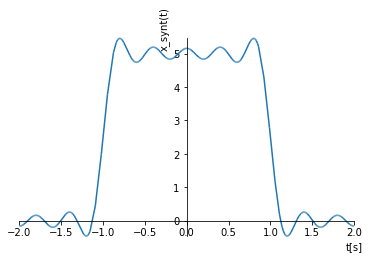

In [20]:
#Synteza signalu z koeficientů Fourierovy řady v komplexním tvaru
x_synt_kkompl = 0
x_synt_kkompl = c_0_num
for kk in range(1,pocet_harmonickych):
    x_synt_kkompl +=(c_kk.subs(k,-kk)*exp(-1j*2*np.pi*f_0_num*(-kk)*tt)+c_kk.subs(k,kk)*exp(-1j*2*np.pi*f_0_num*(kk)*tt));
plot(x_synt_kkompl,(tt,-tau_num,tau_num),xlabel="t[s]",ylabel="x_synt(t)")

Text(0, 0.5, 'phi[k]')

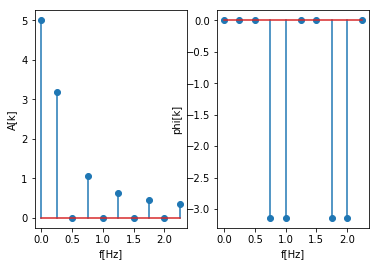

In [21]:
#Koeficienty Fourierovy řady v I. elektrotechnickem tvaru, a_k,b_k => phi_k
A_00 = a_0/2
A_kk = sqrt(Pow(a_k,2)+(Pow(b_k,2)))
A_kk_num = []
phi_k_num = []

for kk in vektor_k_num_real:
    if (kk==0):
        A_kk_num.append(abs(limit(A_kk, k,kk)))
        phi_k_num.append(-atan2(im(limit(((a_k-1j*b_k)/2), k,kk)),re(limit(((a_k-1j*b_k)/2), k,kk))))
    else:
        A_kk_num.append(abs(A_kk.subs(k,kk)))
        phi_k_num.append(-atan2(im(((a_k-1j*b_k)/2).subs(k,kk)),re(((a_k-1j*b_k)/2).subs(k,kk))))
plt.subplot(121);
plt.stem(vektor_f_num_real, A_kk_num);
plt.xlabel('f[Hz]')
plt.ylabel('A[k]')
plt.subplot(122);
plt.stem(vektor_f_num_real, phi_k_num);
plt.xlabel('f[Hz]')
plt.ylabel('phi[k]')


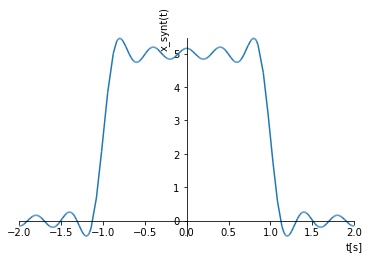

In [22]:
x_synt_I_eltt = A_00
for kk in range(1,pocet_harmonickych):
    x_synt_I_eltt = x_synt_I_eltt + A_kk_num[kk] * cos(2*np.pi*f_0_num * kk *tt - phi_k_num[kk])
plot(x_synt_I_eltt,(tt,-tau_num,tau_num),xlabel="t[s]",ylabel="x_synt(t)")

Text(0, 0.5, 'psi[k]')

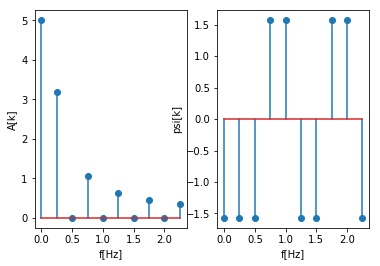

In [23]:
#Koeficienty Fourierovy řady v II. elektrotechnickém tvaru (sin), c_k => A_kk psi_kk
A_00 = a_0/2
A_kk = sqrt(Pow(a_k,2)+(Pow(b_k,2)))
A_kk_num = []
psi_kk_num = []

for kk in vektor_k_num_real:
    if (kk==0):
        A_kk_num.append(abs(limit(A_kk, k,kk)))
        psi_kk_num.append(atan2(im(limit((b_k-1j*a_k/2), k,kk)),re(limit((b_k-1j*a_k/2), k,kk))))
    else:
        A_kk_num.append(abs(A_kk.subs(k,kk)))
        psi_kk_num.append(atan2(im((b_k-1j*a_k/2).subs(k,kk)),re((b_k-1j*a_k/2).subs(k,kk))))
plt.subplot(121);
plt.stem(vektor_f_num_real, A_kk_num);
plt.xlabel('f[Hz]')
plt.ylabel('A[k]')
plt.subplot(122);
plt.stem(vektor_f_num_real, psi_kk_num);
plt.xlabel('f[Hz]')
plt.ylabel('psi[k]')

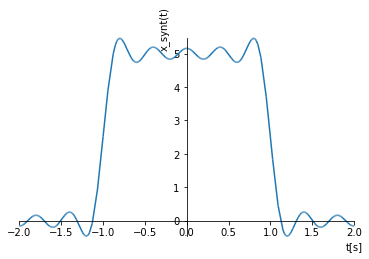

In [24]:
#Syntéza signálu z koeficientů Fourierovy řady v II. elektrotechnickém tvaru
x_synt_II_eltt = A_00
for kk in range(1,pocet_harmonickych):
    x_synt_II_eltt = x_synt_II_eltt + A_kk_num[kk] * sin(2*np.pi*f_0_num * kk *tt - psi_kk_num[kk])
plot(x_synt_II_eltt,(tt,-tau_num,tau_num),xlabel="t[s]",ylabel="x_synt(t)")